In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df0 = pd.read_pickle(r'C:\code\HH_selkobot\evaluation_results_part2.pickle')

In [65]:
df = df0.copy()
texts = df['id'].to_list()
bots = (['_'.join(x.split('_')[1:]) for x in texts])
texts = ([x.split('_')[0] for x in texts])
text_id = set(texts)
df['sample'] = texts
df['bot']=bots

float_columns = [
    "e5_embed_score", "jina_embed_score", "SARI_score", "SARI_score_lemma",
    "openai_custom_score", "openai_embed_score", "openai_selkomittari_score", 
    "geval_score", "length_ratio"
]

# Convert columns
for col in float_columns:
    df[col] = df[col].astype(float)

# Convert other columns to string
df[['id', 'sample', 'bot']] = df[['id', 'sample', 'bot']].astype(str)


In [66]:
grouped_df = df.groupby('bot')[float_columns].mean().reset_index()
grouped_df

,bot,e5_embed_score,jina_embed_score,SARI_score,SARI_score_lemma,openai_custom_score,openai_embed_score,openai_selkomittari_score,geval_score,length_ratio
0,Autogenbot_v1_(gpt-4o),0.933755,0.927653,0.381747,0.397188,87.814815,0.913054,2.956522,0.657704,0.922983
1,Autogenbot_v2_(gpt-4o),0.933837,0.932563,0.394312,0.406188,88.291667,0.925372,2.972826,0.698190,0.990592
2,Autogenbot_v2_examples_(gpt-4o),0.932558,0.934437,0.420061,0.426254,87.708333,0.919287,3.000000,0.686209,0.970088
3,Autogenbot_v2_small_(gpt-4o),0.935392,0.936055,0.407835,0.424777,88.833333,0.924090,3.000000,0.731356,1.015221
4,Autogenbot_v2_small_examples_(gpt-4o),0.932819,0.933773,0.414560,0.419894,88.000000,0.919732,3.000000,0.630519,0.970941
5,single_bot_selkomedia_9rule_(gpt-4o),0.927605,0.903292,0.295720,0.308946,81.041667,0.871862,3.000000,0.573100,0.591001
6,single_bot_selkomedia_simple_(gpt-4o),0.933386,0.922081,0.434832,0.441237,86.666667,0.912177,2.789855,0.733848,1.060330
7,single_bot_v2_(gpt-4o),0.934447,0.922483,0.373204,0.387503,87.541667,0.908554,2.923913,0.623533,0.880015
8,single_bot_v2_examples_(gpt-4o),0.932279,0.928586,0.427560,0.429128,90.476190,0.927337,3.000000,0.718330,0.979689


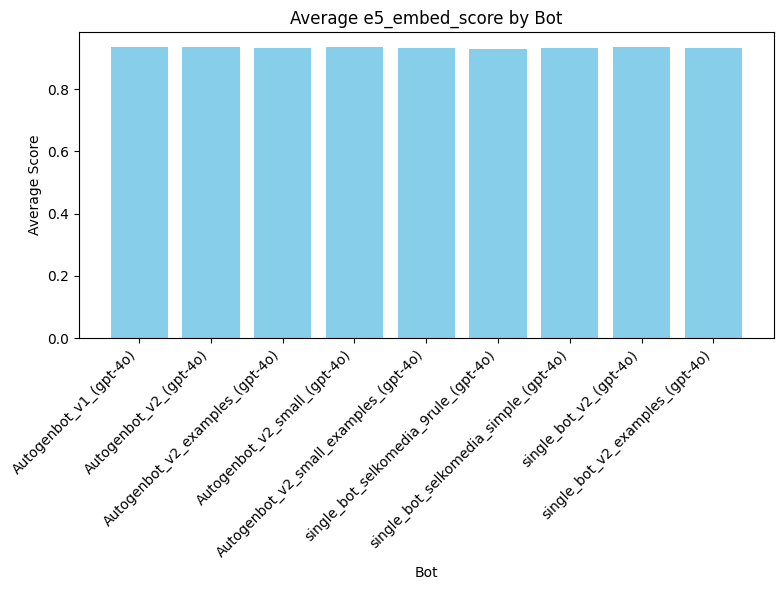

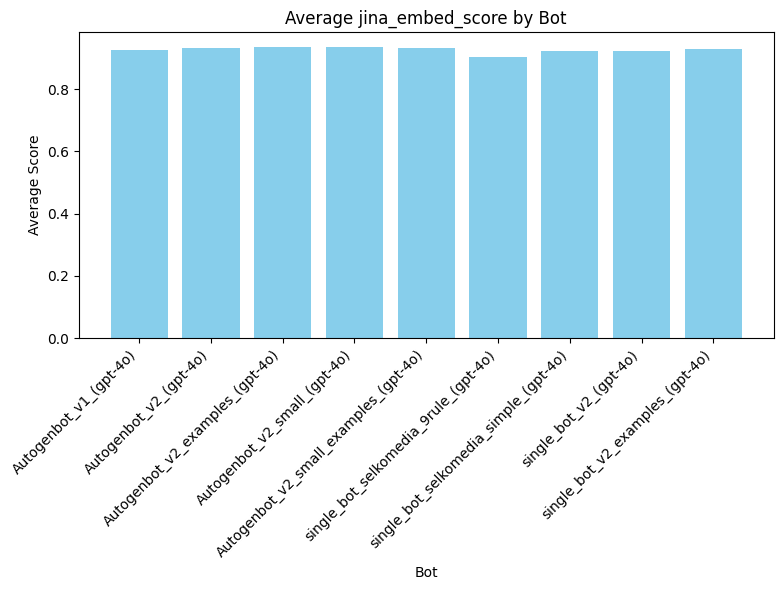

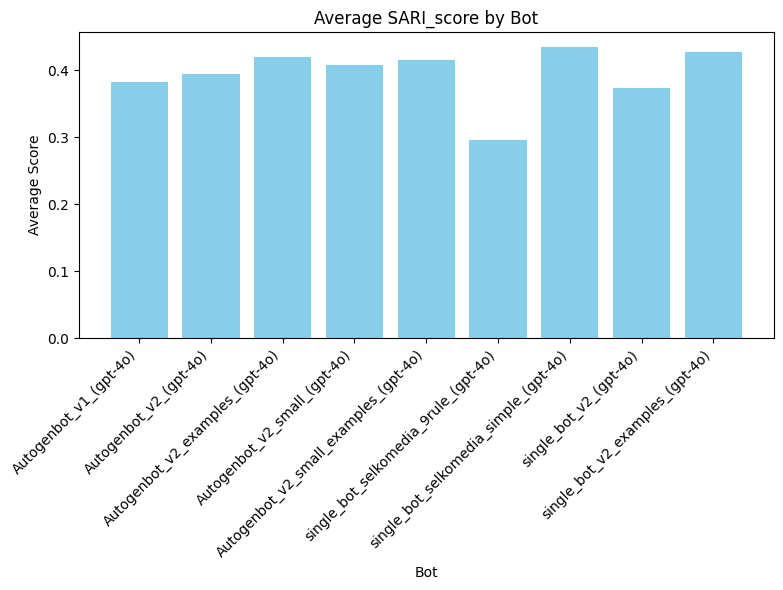

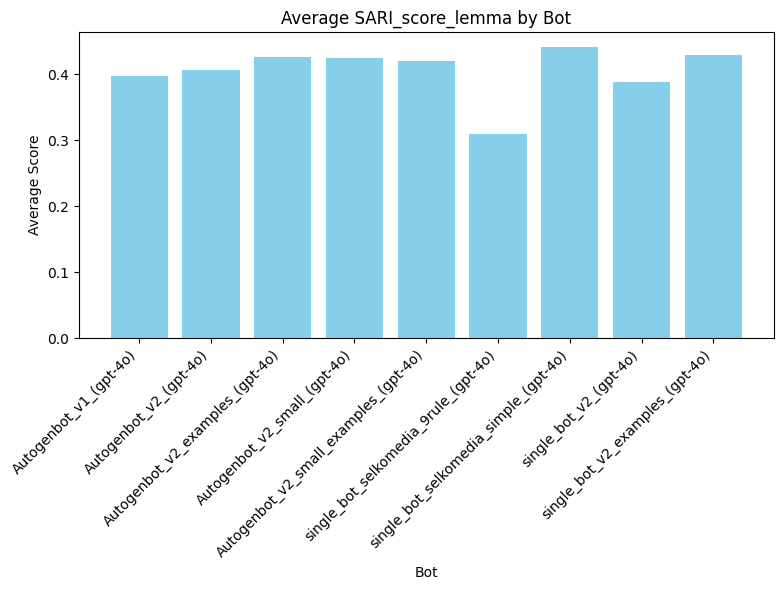

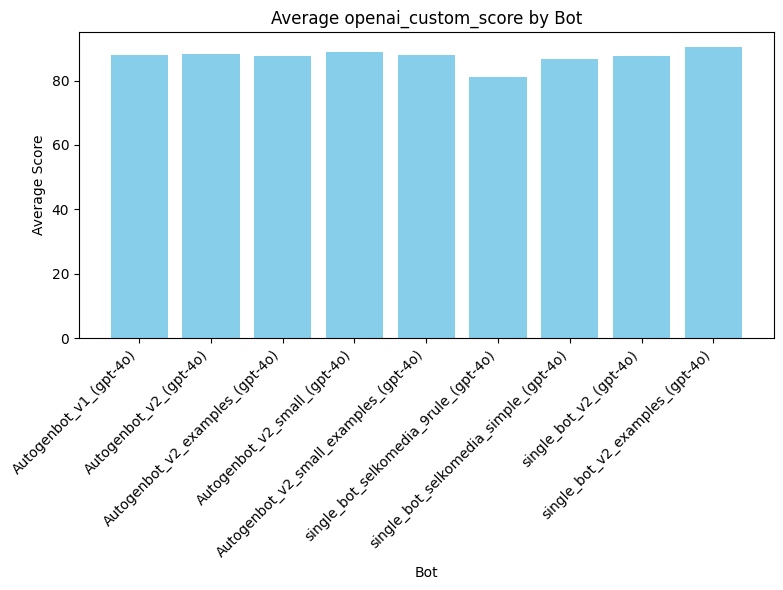

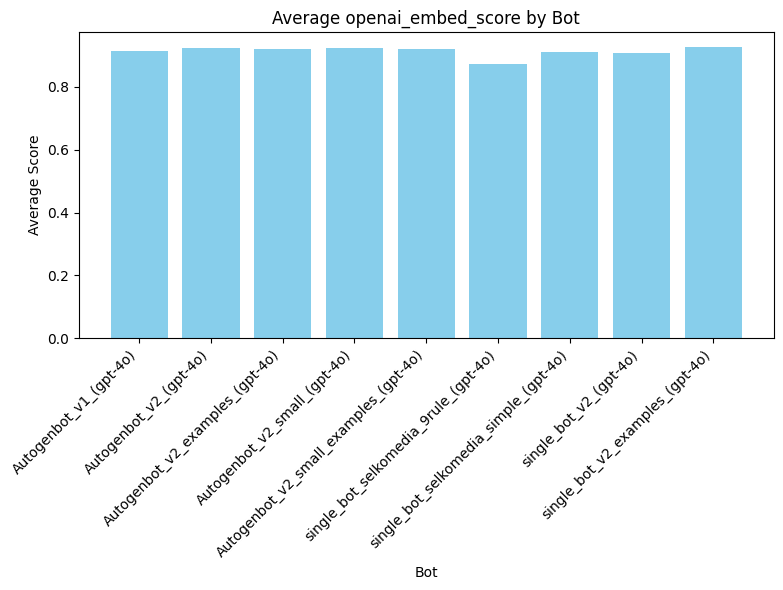

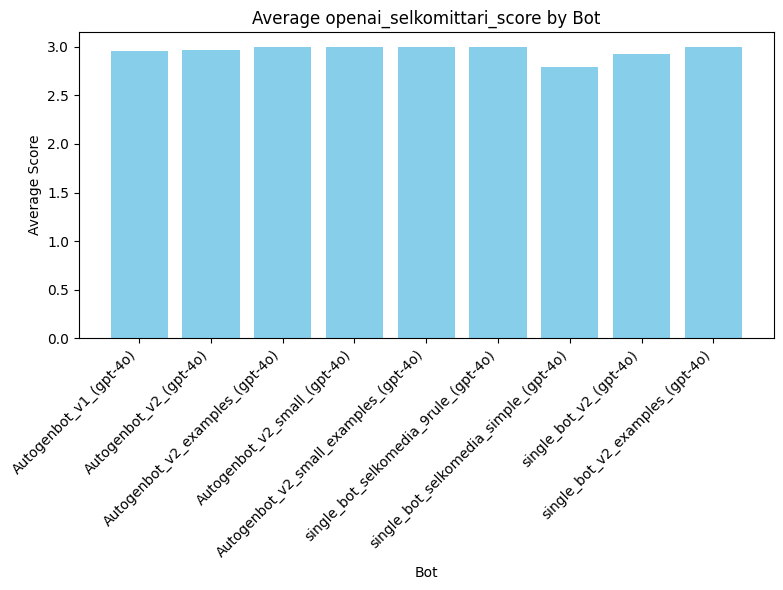

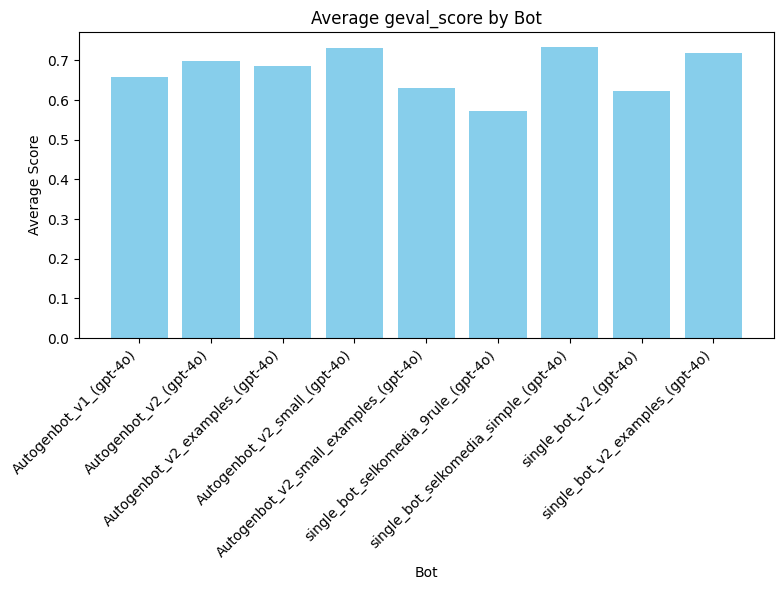

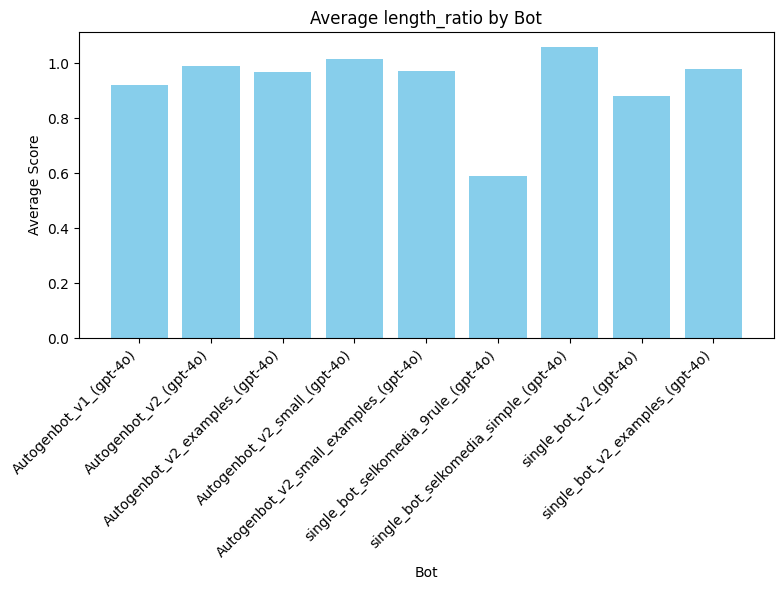

In [67]:
# Group by 'bot' and calculate the mean for each column
grouped_df = df.groupby('bot')[float_columns].mean().reset_index()

# Plotting each score as a separate line plot for comparison across bots
metrics = [
    "e5_embed_score", "jina_embed_score", "SARI_score", "SARI_score_lemma",
    "openai_custom_score", "openai_embed_score", "openai_selkomittari_score", 
    "geval_score", "length_ratio"
]

# Creating separate bar plots for each metric
for metric in float_columns:
    plt.figure(figsize=(8, 6))
    plt.bar(grouped_df['bot'], grouped_df[metric], color='skyblue')
    plt.xlabel("Bot")
    plt.ylabel("Average Score")
    plt.title(f"Average {metric} by Bot")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

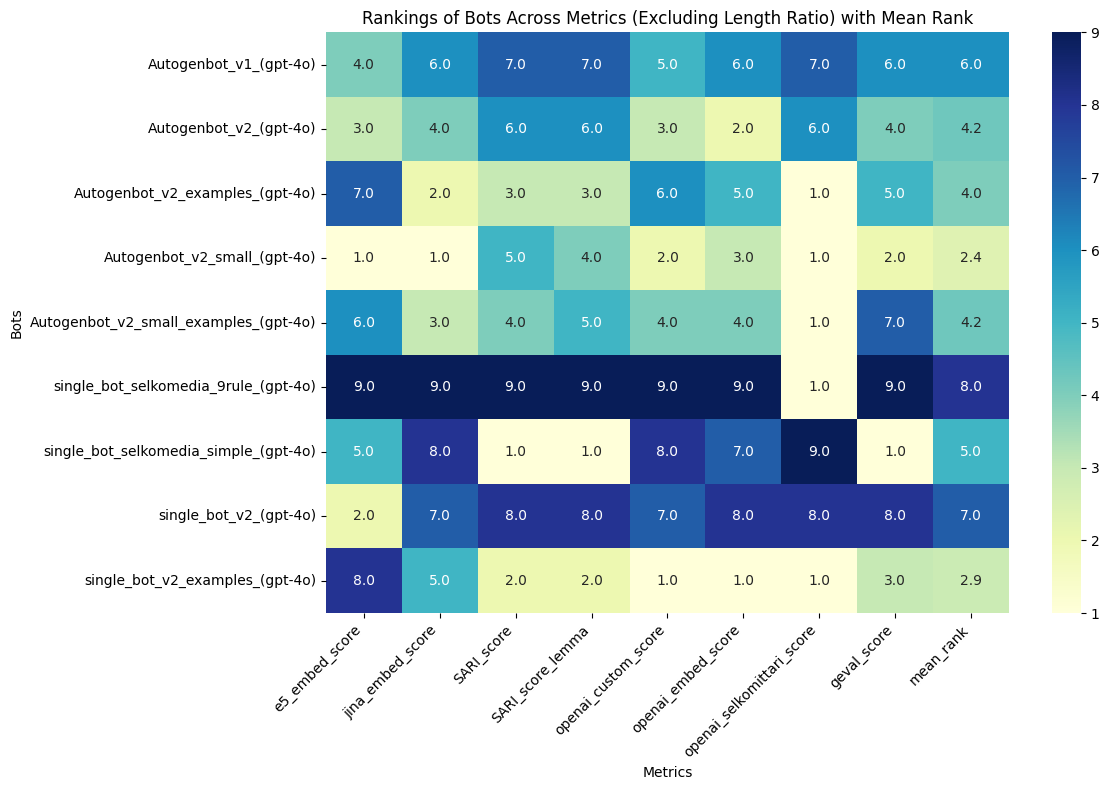

In [93]:
# Rank each bot per metric and convert ranks to integers
# Remove 'length_ratio' from the list of metrics to be ranked
metrics_excluding_length_ratio = [col for col in float_columns if col != "length_ratio"]

# Re-rank the DataFrame without 'length_ratio'
ranked_df = grouped_df[['bot'] + metrics_excluding_length_ratio].copy()
for metric in metrics_excluding_length_ratio:
    ranked_df[metric] = ranked_df[metric].rank(method='min', ascending=False).astype(int)

ranked_df.set_index('bot', inplace=True)
ranked_df['mean_rank'] = ranked_df.mean(axis=1)

# Plot heatmap with ranks excluding 'length_ratio'
plt.figure(figsize=(12, 8))
heatmap=sns.heatmap(ranked_df, annot=True, cmap="YlGnBu", fmt=".1f", cbar=True, cbar_kws={'orientation': 'vertical'})
# Get the colorbar and reverse its ticks
#cbar = heatmap.collections[0].colorbar
#cbar.set_ticks(cbar.get_ticks()[::-1])  # Reverse tick order
plt.title("Rankings of Bots Across Metrics (Excluding Length Ratio) with Mean Rank")
plt.xlabel("Metrics")
plt.ylabel("Bots")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()